## Exploring Topics and Inferring Hidden Dimensions

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from top2vec import Top2Vec
from sklearn.decomposition import PCA

/home/doosti@chapman.edu/.conda/envs/ctopics/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-26 14:09:12.611789: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 14:09:12.698445: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 14:09:12.700202: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-26 14:09:14.540196: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
PATH = "/home/doosti@chapman.edu/projects/Facebook/top2vec/"
DATA_PATH = os.path.join(PATH,'data')

In [4]:
model_name = "top2vec_deeplearn_distiluse_notoken_2024-06-27_reduced_20.model"
model = Top2Vec.load(os.path.join(DATA_PATH,model_name))

In [5]:
# open the hierarchical topics
with open(os.path.join(DATA_PATH,model_name.replace('.model','.hierarchy')),'rb') as file:
    hierarchy = pickle.load(file)

In [6]:
# number of topics
n_topics = model.get_num_topics()
print(n_topics)

3936


In [26]:
# calculate PCA dimensions for topics
topic_sizes, topic_nums = model.get_topic_sizes()
topic_vectors = model.topic_vectors
# Initialize PCA, reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
#topic_vectors_reduced = pca.fit_transform(topic_vectors)
weighted_vectors = topic_vectors * np.sqrt(topic_sizes[:, np.newaxis])
topic_vectors_reduced = pca.fit_transform(weighted_vectors)


In [20]:
topics_words, _1, _2 = model.get_topics()

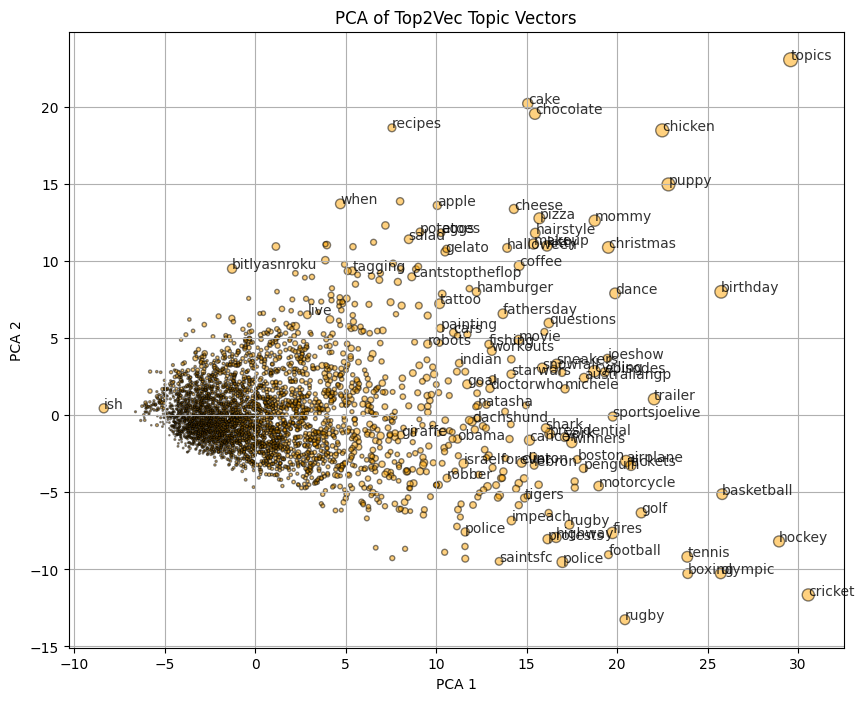

In [35]:
plt.figure(figsize=(10, 8))
plt.scatter(topic_vectors_reduced[:, 0], topic_vectors_reduced[:, 1], 
            s=topic_sizes/np.max(topic_sizes)*100, edgecolors='k', c='orange',
            alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Top2Vec Topic Vectors')
for i, (num, s) in enumerate(zip(topic_nums,topic_sizes)):
    if s > 0.3 * np.max(topic_sizes):
        w = plt.annotate(topics_words[num][0], (topic_vectors_reduced[i, 0], topic_vectors_reduced[i, 1]))
        w.set_alpha(0.8)
plt.grid(True)
plt.show()
#plt.savefig("pca_topics.jpg")

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(topic_vectors_reduced[:, 0], topic_vectors_reduced[:, 1], edgecolors='k', c='orange')
for i, txt in enumerate(topic_nums):
    keywords = ', '.join(model.get_topic_words(topic_num=txt, num_words=5))
    plt.annotate(keywords, (topic_vectors_reduced[i, 0], topic_vectors_reduced[i, 1]),
                 textcoords="offset points", xytext=(0,10), ha='center', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Top2Vec Topic Vectors with Keywords')
plt.grid(True)
plt.show()

In [22]:
topics_words, word_scores, topic_nums = model.get_topics()

In [23]:
topics_words[:10]

array([['topics', 'topic', 'themes', 'theme', 'discussions', 'subject',
        'discusses', 'discussion', 'discuss', 'discussing', 'discussed',
        'gopdebate', 'debates', 'debate', 'matters', 'conversations',
        'matter', 'threads', 'issues', 'thread', 'conversation',
        'debating', 'forums', 'talkin', 'forum', 'chattingcage', 'talk',
        'headlines', 'talktalk', 'issue', 'chatting', 'headline',
        'tmltalk', 'about', 'talks', 'problems', 'problematic',
        'chattanooga', 'posts', 'speeches', 'troubles', 'speaks',
        'problem', 'articles', 'gossip', 'talking', 'parlour', 'rants',
        'stuff', 'concerns'],
       ['chicken', 'chickens', 'rooster', 'menu', 'lovetocook',
        'cookware', 'cook', 'recipes', 'kanaan', 'cooks', 'cooking',
        'cooked', 'chickpea', 'recipe', 'poultry', 'nuggets', 'culinary',
        'chickpeas', 'roasted', 'cooke', 'cookout', 'cooker', 'boiled',
        'chickfila', 'cookbook', 'kebabs', 'kebab', 'cockatoo',
      

In [40]:
words = model.get_topics()[0][0]

word_vectors = np.array([model._get_word_vector(word) for word in words])